In [10]:
from taxumap.taxumap_base import Taxumap

import seaborn as sns
from matplotlib import pyplot as plt

# Outline

This notebook demonstrates how different `agg_levels` and `weights` adjust the final TaxUMAP embedding.

## Brief description of `agg_levels`

* `agg_levels` designate which taxonomic levels TaxUMAP should consider when incorporating the hierarchical information into UMAP.
* `agg_levels` is a python `list` with strings as values, each corresponding to the taxonomic levels TaxUMAP will utilize.
* `agg_levels` must be ordered left -> right in ***increasing*** specificity, e.g., `['Kingdom', 'Genus']` or `['Phylum', 'Order']`.
* By default, `agg_levels` is set to `['Phylum', 'Family']`.


## Brief description of `weights`

* `weights` designate the weight given to each taxonomic label in `agg_levels`
* For example, if using the default `agg_levels` of `['Phylum', 'Family']`, a `weights` parameter of [1, 1] says that these should be weighted the same.
* By default, `weights` is set to `[1, 1]` to correspond to default `agg_levels` of `['Phylum', 'Family']`.
* Weights should be any positive number.
* For more information, please see documentation on the GitHub page.

## Very Important Detail

* Since `weights` designate the weight given to each label in `agg_levels`, ***`weights` and `agg_levels` must be the same length***. 

## Examples

#### Default example

* In the below example, we're using the *default* settings in TaxUMAP, which are for `agg_levels=['Phylum', 'Family']` with `weights=[1,1]`.


* Since `agg_levels=['Phylum', 'Family']` with `weights=[1,1]` is the default, the code blocks:

```python
tu = Taxumap(
    taxonomy="example_data/taxonomy.csv",
    microbiota_data="example_data/microbiota_table.csv",
)
```

and 


```python
tu = Taxumap(
    taxonomy="example_data/taxonomy.csv",
    microbiota_data="example_data/microbiota_table.csv",
    agg_levels=["Phylum", "Family"],
    weights=[1, 1],
)
```

are equivalent.

/Users/granthussey/github/clean-taxumap/taxumap/dataloading.py:95: UserWarning: Reading taxonomy table. Assuming columns are ordered by phylogeny with in descending order of hierarchy:
                 e.g. Kingdom, Phylum, ... , Genus, Species, etc.
                 Additionally, the OTU or ASV column must be labeled as 'OTU' or 'ASV' unless otherwise specified
  warnings.warn(
/Users/granthussey/github/clean-taxumap/taxumap/input_validation.py:209: UserWarning: ensure_monophyletic_for_hct_dataset failed. likely not hct data set.
  warnings.warn("ensure_monophyletic_for_hct_dataset failed. likely not hct data set.")
/Users/granthussey/github/clean-taxumap/taxumap/taxumap_base.py:89: UserWarning: Please set neigh parameter to approx. the size of individals in the dataset. See documentation.
  warnings.warn(
/Users/granthussey/github/clean-taxumap/taxumap/taxumap_base.py:97: UserWarning: Setting min_dist to 0.05/sum(weights)
  warnings.warn("Setting min_dist to 0.05/sum(weights)")
/User

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='taxumap-PF-1', ylabel='taxumap-PF-2'>)

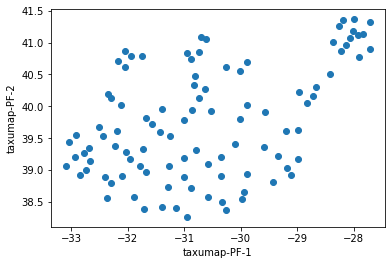

In [11]:
tu = Taxumap(
    taxonomy="example_data/taxonomy.csv",
    microbiota_data="example_data/microbiota_table.csv",
    agg_levels=["Phylum", "Family"],
    weights=[1, 1],
)

tu.transform_self()

tu.scatter()



#### Adjusting `agg_levels`

* In the below example, we are running a TaxUMAP with `agg_levels=['Phylum', 'Order']` and `weights=[1,1]`.
* Notice that, compared to the above ***`agg_levels=['Phylum', 'Family']`*** and `weights=[1,1]` scatterplot, the embedding is slightly different. This is because TaxUMAP is considering different taxonomic levels when generating the embedding.

/Users/granthussey/github/clean-taxumap/taxumap/dataloading.py:95: UserWarning: Reading taxonomy table. Assuming columns are ordered by phylogeny with in descending order of hierarchy:
                 e.g. Kingdom, Phylum, ... , Genus, Species, etc.
                 Additionally, the OTU or ASV column must be labeled as 'OTU' or 'ASV' unless otherwise specified
  warnings.warn(
/Users/granthussey/github/clean-taxumap/taxumap/input_validation.py:209: UserWarning: ensure_monophyletic_for_hct_dataset failed. likely not hct data set.
  warnings.warn("ensure_monophyletic_for_hct_dataset failed. likely not hct data set.")
/Users/granthussey/github/clean-taxumap/taxumap/taxumap_base.py:89: UserWarning: Please set neigh parameter to approx. the size of individals in the dataset. See documentation.
  warnings.warn(
/Users/granthussey/github/clean-taxumap/taxumap/taxumap_base.py:97: UserWarning: Setting min_dist to 0.05/sum(weights)
  warnings.warn("Setting min_dist to 0.05/sum(weights)")
/User

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='taxumap-PO-1', ylabel='taxumap-PO-2'>)

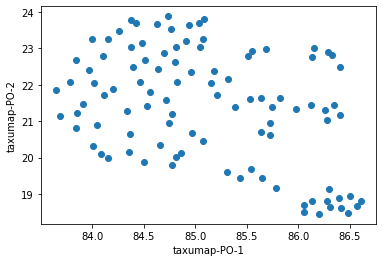

In [12]:
tu = Taxumap(
    taxonomy="example_data/taxonomy.csv",
    microbiota_data="example_data/microbiota_table.csv",
    agg_levels=["Phylum", "Order"],
    weights=[1, 1],
)

tu.transform_self()

tu.scatter()


#### Adjusting `weights` 

* In the below example, we are running a TaxUMAP with `agg_levels=['Phylum', 'Family']` and ***`weights=[10,1]`***.
* Notice how the structure of this TaxUMAP drastically changes. Two distinct lobes form, each *likely* enriched in one of the three major phyla in the data. We will investigate that below.

/Users/granthussey/github/clean-taxumap/taxumap/dataloading.py:95: UserWarning: Reading taxonomy table. Assuming columns are ordered by phylogeny with in descending order of hierarchy:
                 e.g. Kingdom, Phylum, ... , Genus, Species, etc.
                 Additionally, the OTU or ASV column must be labeled as 'OTU' or 'ASV' unless otherwise specified
  warnings.warn(
/Users/granthussey/github/clean-taxumap/taxumap/input_validation.py:209: UserWarning: ensure_monophyletic_for_hct_dataset failed. likely not hct data set.
  warnings.warn("ensure_monophyletic_for_hct_dataset failed. likely not hct data set.")
/Users/granthussey/github/clean-taxumap/taxumap/taxumap_base.py:89: UserWarning: Please set neigh parameter to approx. the size of individals in the dataset. See documentation.
  warnings.warn(
/Users/granthussey/github/clean-taxumap/taxumap/taxumap_base.py:97: UserWarning: Setting min_dist to 0.05/sum(weights)
  warnings.warn("Setting min_dist to 0.05/sum(weights)")
/User

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='taxumap-PF-1', ylabel='taxumap-PF-2'>)

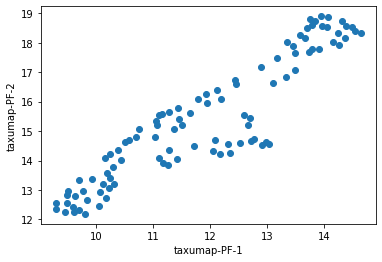

In [23]:
tu = Taxumap(
    taxonomy="example_data/taxonomy.csv",
    microbiota_data="example_data/microbiota_table.csv",
    agg_levels=["Phylum", "Family"],
    weights=[10, 1],
)

tu.transform_self()

tu.scatter()


To investigate the two extreme "lobes" of this TaxUMAP, I will use Seaborn to visualize the most dominant taxa of each and every point in the TaxUMAP.

To do this, I will use two DataFrames built into the TaxUMAP object, `tu`: `tu.df_dominant_taxon` and `tu.df_embedding`.

In [ ]:
# This helper table can be generated from your TaxUMAP `tu` object.
tu.df_dominant_taxon

,max_tax,dom_kingdom,dom_phylum,dom_class,dom_order,dom_family,dom_genus,dom_species
index_column,,,,,,,,
66600164,Uniq1,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,Staphylococcus_epidermidis
66600169,Uniq1,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,Staphylococcus_epidermidis
66600226,Uniq1,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,Staphylococcus_epidermidis
66627214,Uniq1,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,Staphylococcus_epidermidis
66627235,Uniq1,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,Staphylococcus_epidermidis
...,...,...,...,...,...,...,...,...
66627255,Uniq9,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Klebsiella,Klebsiella
66627277,Uniq9,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Klebsiella,Klebsiella
66627283,Uniq9,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Klebsiella,Klebsiella


In [ ]:
# This table is how to directly access your TaxUMAP embedding.
tu.df_embedding

,taxumap1,taxumap2
index_column,,
66600164,14.056220,18.860838
66600169,13.747175,18.800327
66600209,9.296144,12.358088
66600224,10.434681,14.006400
66600226,13.781713,18.601402
...,...,...
66704977,12.690969,15.457298
66704978,12.590614,15.560212
66704990,11.506459,15.207390


In [ ]:
# Here, I will merge these two dataframes to easily visualize the TaxUMAP.
df_plot = tu.df_dominant_taxon[['dom_phylum']].join(tu.df_embedding)
df_plot

,dom_phylum,taxumap1,taxumap2
index_column,,,
66600164,Firmicutes,14.056220,18.860838
66600169,Firmicutes,13.747175,18.800327
66600226,Firmicutes,13.781713,18.601402
66627214,Firmicutes,14.045432,18.521448
66627235,Firmicutes,13.567925,18.264597
...,...,...,...
66627255,Proteobacteria,11.105973,15.548492
66627277,Proteobacteria,9.592013,12.407439
66627283,Proteobacteria,10.703127,14.783077


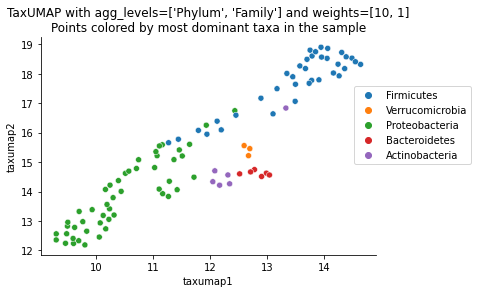

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot(x='taxumap1', y='taxumap2', hue='dom_phylum', data=df_plot, ax=ax)

ax.legend(loc='upper right', bbox_to_anchor=[1.3, 0.8])
ax.set_title("TaxUMAP with agg_levels=['Phylum', 'Family'] and weights=[10, 1]\nPoints colored by most dominant taxa in the sample")

sns.despine()

You can see in the above graph that by heavily weighing the phylum in TaxUMAP, we can see that there is structure in the TaxUMAP based on what phylum dominates.

#### Adjusting `weights` (again)

* In the below example, we are running a TaxUMAP with `agg_levels=['Phylum', 'Family']` and ***`weights=[1,10]`***.
* Since the family is heavily weighted, new sub-groups separate out.

/Users/granthussey/github/clean-taxumap/taxumap/dataloading.py:95: UserWarning: Reading taxonomy table. Assuming columns are ordered by phylogeny with in descending order of hierarchy:
                 e.g. Kingdom, Phylum, ... , Genus, Species, etc.
                 Additionally, the OTU or ASV column must be labeled as 'OTU' or 'ASV' unless otherwise specified
  warnings.warn(
/Users/granthussey/github/clean-taxumap/taxumap/input_validation.py:209: UserWarning: ensure_monophyletic_for_hct_dataset failed. likely not hct data set.
  warnings.warn("ensure_monophyletic_for_hct_dataset failed. likely not hct data set.")
/Users/granthussey/github/clean-taxumap/taxumap/taxumap_base.py:89: UserWarning: Please set neigh parameter to approx. the size of individals in the dataset. See documentation.
  warnings.warn(
/Users/granthussey/github/clean-taxumap/taxumap/taxumap_base.py:97: UserWarning: Setting min_dist to 0.05/sum(weights)
  warnings.warn("Setting min_dist to 0.05/sum(weights)")
/User

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='taxumap-PF-1', ylabel='taxumap-PF-2'>)

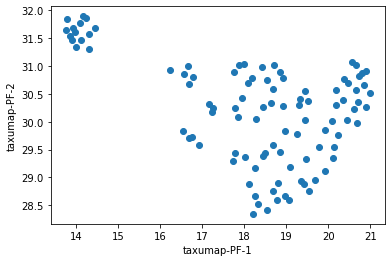

In [25]:
tu = Taxumap(
    taxonomy="example_data/taxonomy.csv",
    microbiota_data="example_data/microbiota_table.csv",
    agg_levels=["Phylum", "Family"],
    weights=[1, 10],
)

tu.transform_self()

tu.scatter()


We can perform the same analysis as in the previous example:

1. Join `tu.df_embedding` with `tu.df_dominant_taxon`
2. Use `seaborn` to plot the most dominant *family* to see how the families cluster in the TaxUMAP embedding with `agg_levels=['Phylum', 'Family']` and ***`weights=[1,10]`***

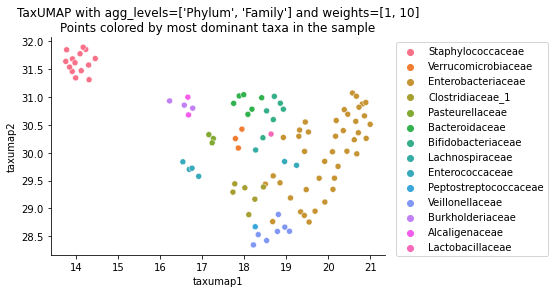

In [31]:
# This time, we merge with 'dom_family'
df_plot = tu.df_dominant_taxon[['dom_family']].join(tu.df_embedding)

fig, ax = plt.subplots()

sns.scatterplot(x='taxumap1', y='taxumap2', hue='dom_family', data=df_plot, ax=ax)

ax.legend(loc='upper right', bbox_to_anchor=[1.5, 1])
ax.set_title("TaxUMAP with agg_levels=['Phylum', 'Family'] and weights=[1, 10]\nPoints colored by most dominant taxa in the sample")

sns.despine()

In the above figure, we can see that the family *Staphylococcaceae* separates far outside of the other samples, leading to the suggestion that *Staphylococcaceae*-dominated samples may have a much different microbiome composition compared to samples dominanted with other families. 

# References

The Olin et al. dataset is used here to provide an practical example of using TaxUMAP. The original publication and dataset can be found below:

## Publication

> Olin A, Henckel E, Chen Y, et al. Stereotypic Immune System Development in Newborn Children. Cell. 2018;174(5):1277-1292.e14. doi:10.1016/j.cell.2018.06.045

## Dataset

> Olin, Axel (2018), “Stereotypic Immune System Development in Newborn Children”, Mendeley Data, v1
